# Generating noise in tabular data

This tutorial shows how to generate noise on pre-existing tabular data and to visualize both the original and the transformed data




In [5]:
from sklearn.datasets import make_blobs
from badgers.generators.tabular_data.noise import GaussianNoiseGenerator, GaussianNoiseClassesGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
def plot_noise(X, y, Xt, yt):
    """
    Some utility function to generate the plots
    """
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    sns.scatterplot(data=X, x='dimension_0', y='dimension_1', hue=y, ax=axes[0])
    sns.scatterplot(data=Xt, x='dimension_0', y='dimension_1', hue=yt, ax=axes[1])
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    return fig, axes


## Setup random generator

In [7]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [8]:
# load data
X, y = make_blobs(centers=4, random_state=0)
X = pd.DataFrame(data=X, columns=['dimension_0', 'dimension_1'])
y = pd.Series(y)

## Generate noise

The transformer applies an additive Gaussian noise to each dimension

In [9]:
trf = GaussianNoiseGenerator(noise_std=0.25, random_generator=rng)
Xt, yt = trf.generate(X.copy(), y)

array([[ 0.5200547 ,  3.03752635],
       [-2.26305289,  8.17050588],
       [ 1.50472996,  4.65984392],
       [ 1.69739046,  5.29583638],
       [ 1.9010118 ,  4.68593615],
       [ 0.3183289 ,  4.02827158],
       [-3.39761551,  4.68612908],
       [-0.8397867 ,  7.44836433],
       [-0.9663074 ,  6.04954075],
       [-1.43871517,  8.27182551],
       [-0.66393165,  7.10422922],
       [-2.53728648,  6.51853353],
       [-0.89526837,  6.72830416],
       [-1.04779288,  7.06646234],
       [-0.59016134,  7.32716226],
       [ 3.50006048, -0.5856805 ],
       [ 0.81301153,  3.19185447],
       [ 0.94944182,  4.09271008],
       [-2.48511709,  2.86569882],
       [ 3.53505601,  0.63086201],
       [ 2.69936149,  3.8307289 ],
       [-1.81136995,  7.90407666],
       [-2.18199829,  3.25365045],
       [ 3.15397586,  0.63203592],
       [ 0.86304041,  5.54312432],
       [-1.4701885 ,  1.47118632],
       [ 0.39410411,  4.82391624],
       [ 0.06897496,  4.71624968],
       [ 3.73015866,

C:\Users\siebert\PycharmProjects\badgers\venv\Lib\site-packages\seaborn\_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `dimension_0` for parameter `x`

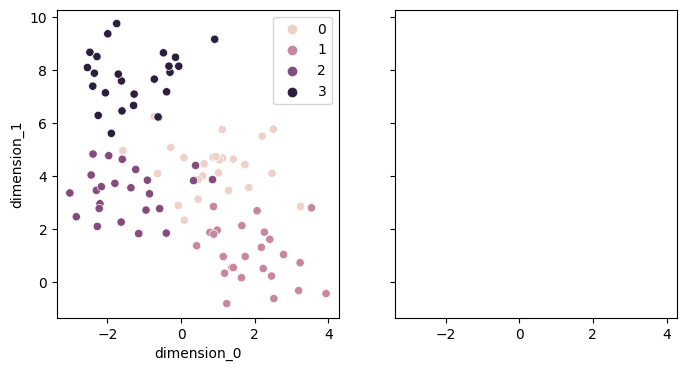

In [10]:
fig, axes = plot_noise(X, y, Xt, yt)

## Generate noise for each class separately

The transformer applies an additive Gaussian noise to each dimension for each class separately.

In [7]:
trf = GaussianNoiseClassesGenerator(noise_std_per_class={0:0.1, 1:0.2, 2:0.3, 3:0.4}, random_generator=rng)
Xt, yt = trf.generate(X.copy(), y)

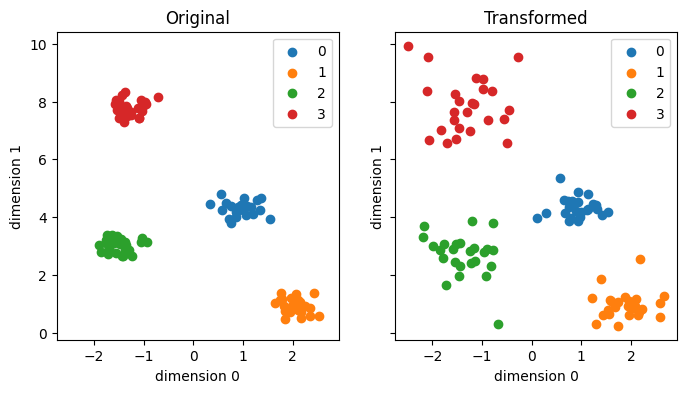

In [8]:
fig, axes = plot_noise(X, y, Xt, yt)